In [22]:
#!pip install ipdb
#import ipdb #Esses comandos foram para importar essa biblioteca
            #que serviu de ferramenta para estudar erros do código
            #usando debug
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.io.cif import CifParser
import time
import sys #Esse comando foi para importar uma biblioteca que pode
           #"""acessar o sistema""" e forçar certas coisas como
           #forçar a interrupção do algoritmo
import traceback
import pandas as pd #Essa biblioteca foi utilizada para ter
                    #acesso aos conjuntos de dados bidimen-
                    #sionais conhecidos como DataFrames
import glob
import os
def tecla():
    time.sleep(1)
    for i in range(4):
        time.sleep(0.25)
        print('\n'+'...                                              ...')
    input('\n'+'Pressione Enter para sair...'+'\n')
    sys.exit()
def perguntaCancelar(): #Essa função é utilizada para perguntar se o usuário
                    #deseja cancelar o programa
    letraSaida=input('\n'+'-->Sempre confira se executou tudo corretamente.'+'\n'+
                     '-->Se deseja cancelar a execução, tecle X:'+'\n') #Variável que recebe a resposta em string
    if letraSaida == 'x' or letraSaida=='X': #Se a variável tiver como dado a string correspondente a
                                       #x maiúsculo ou minúsculo...
        print('-->Para recomeçar, feche o executável e abra-o novamente.')
        tecla()  #...O programa será forçado a parar
def main():
    print('------------------------------------------------------------------------------------------------'+'\n'+
          '--------------->SEMPRE LEIA TUDO COM ATENÇÃO PARA EVITAR POSSÍVEIS ERROS<-----------------------'+'\n'+
          '------------------------------------------------------------------------------------------------'+'\n')
    #Variável responsável por armazenar qual tipo de arquivo deve ser buscado
    extensaoArquivo='*.cif'
    #Variaveis que vão receber e adicionar os caminhos em string para utilizar mais na frente
    caminhoCIFs=input('-->Insira o caminho da pasta com os arquivos .cif que deseja comparar com seu padrão de difração. Será criado uma planilha com os dados de\n'+
                      '-->ângulo e intensidade de cada arquivo na mesma pasta. Também será colocado a planilha de saída dessas comparações na mesma pasta.\n'+
                      '---->Exemplo:...\...\pasta<----'+'\n'+
                      '-->O recomendado é colocar o caminho inteiro mesmo que o executável esteja na mesma pasta'+'\n')
    caminhoPadrao=input('-->Agora, insira o caminho de UMA PASTA QUE HAVERÁ SOMENTE DOIS ARQUIVOS:\n-->A planilha .xlsx com a coluna de picos do padrão de difração para análise (Seus dados).'+'\n'+
                        '-->E um arquivo .xy que tem seu padrão de difração no todo, todos os pontos de ângulo e intensidade ao longo do intervalo estudado.\n-->Caso seu padrão esteja em outra extensão de arquivo, utilize o PowDLL para converter para .xy.\n---->Exemplo:...\...\pasta<----\n')
    #Variável para saber o comprimento de onda utilizado para montar os padrões de difração dos CIFs
    comprimentoOndaAngstronStr=input('-->Por fim, é necessário informar um comprimento de onda em angstron para ser utilizado como\n'+
                                  '-->radiação característica na construção dos padrões de difração das estruturas dos CIFs:\n'+
                                 '-->LEMBRE-SE DE UTILIZAR . AO INVÉS DE , COMO SEPARADOR DECIMAL:\n')
    comprimentoOndaAngstron=float(comprimentoOndaAngstronStr)
    perguntaCancelar()
    #Arquivo que vai guardar o caminho do arquivo .xy
    buscaXyPadrao = os.path.join(caminhoPadrao,'*.xy')
    #Transforma numa array de strings caminho
    ArrayCaminhoXy=glob.glob(buscaXyPadrao)
    #Arquivo que vai guardar o caminho do arquivo .xlsx
    buscaPlanilhaPadrao = os.path.join(caminhoPadrao,'*.xlsx')
    ArrayCaminhoPlanilhaPadrao = glob.glob(buscaPlanilhaPadrao)
    #Coleta-se o único item dessa array criada na linha anterior
    caminhoPadrao=ArrayCaminhoPlanilhaPadrao[0]
    #DataFrame criado com os dados do arquivo .xy
    dataFramePadraoNoTodo = pd.read_csv(ArrayCaminhoXy[0], delim_whitespace=True,header=None, names=['x','y'])
    #Contagem de linhas para determinar qual é a última linha do padrão
    quantLinhasPadraoNoTodo = dataFramePadraoNoTodo['x'].count()
    ultimaLinha=quantLinhasPadraoNoTodo-1
    #Variável para ter o primeiro ângulo do nosso padrão de difração
    primeiroAnguloPadrao=dataFramePadraoNoTodo.iloc[0,0]
    #Variável para ter o último ângulo do nosso padrão de difração
    UltimoAnguloPadrao=dataFramePadraoNoTodo.iloc[ultimaLinha,0]
    #Se trata do comando para buscar os arquivos CIF no caminho especificado de maneira responsiva
    buscaDosCIFs=os.path.join(caminhoCIFs,extensaoArquivo)
    #Array com os caminhos de cada arquivo
    arrayCaminhosCIF=glob.glob(buscaDosCIFs)
    #Quantidade de arquivos e portanto de abas presentes na planilha dos CIFs e de comparação
    numeroDeAbas=len(arrayCaminhosCIF)
    #Array com os nomes dos arquivos feita utilizando uma sacada interessante do chamado "Compreensão de lista"
    #É uma maneira bem simples e rápida de criar uma array
    arrayNomesCIF=[os.path.basename(itemDoCaminhosCIF) for itemDoCaminhosCIF in arrayCaminhosCIF]
    #A partir daqui criamos uma array de DataFrames com ângulo e intensidade de cada CIF que será utilizado para comparar com o padrão de difração
    arrayDeDataFramesCIFs=[]
    for numeroAba in range(numeroDeAbas):
        #Seleciona o caminho do arquivo da lista de caminhos
        arquivoCIF=arrayCaminhosCIF[numeroAba]
        #Variável responsável por armazenar a leitura do arquivo .cif 
        #O nome da variável é em referência ao processo de parsing 
        #(Leitura de um arquivo, explicando de um jeito bem rude)
        parser = CifParser(arquivoCIF)
        #Variável para armazenar a estrutura cristalina do arquivo a partir dessa leitura
        #o [0] se deve ao fato de o parse_structures ser uma lista de estruturas
        #Isso eu já não sei explicar pois não me delonguei muito na biblioteca
        estrutura = parser.parse_structures(primitive=False)[0]
        #Variável que guarda a configuração do calculador de difração de raio x ou x-ray diffraction (xrd)
        xrdCalculador = XRDCalculator(wavelength=comprimentoOndaAngstron)
        #Variável que guarda o padrão de difração com os valores de ângulo e intendidade do arquivo CIF
        xrdPadrao = xrdCalculador.get_pattern(estrutura)
        #Aqui vamos criar uma variável que vai alocar um valor lógico, verdadeiro ou falso. No caso,
        #se o padrão calculado está dentro do intervalo pensado para o nosso padrão de difração.
        #Ângulo é uma variável temporária

        #essa solução utilizando esse molde -
        #('proposição com variável temporária' for 'variável temporária' in 'Dada array') -
        #está ficando cada vez mais comum e é cada vez mais interessante (Comentário fora de cronologia, desconsidere)
        
        angulosNoIntervalo=all(10.0 <= angulo <= 79.9 for angulo in xrdPadrao.x)
        #Se verdadeiro
        if angulosNoIntervalo:
            #Variável para alocar o dataFrame recém criado
            df = pd.DataFrame({"Ângulo-2theta": xrdPadrao.x, "Intensidade": xrdPadrao.y})
            #Por fim, esses dados devem ser transpostos em uma array
            arrayDeDataFramesCIFs.append(df)
        else:
            #Aqui ocorre uma filtragem para as únicas linhas que podem estar no dataframe
            #são linhas dentro do intervalo
            df = pd.DataFrame({"Ângulo-2theta": xrdPadrao.x, "Intensidade": xrdPadrao.y})
            linhasFiltradas= df.loc[(df["Ângulo-2theta"]>=10) & (df["Ângulo-2theta"]<=79.9)]
            df = linhasFiltradas
            arrayDeDataFramesCIFs.append(df)
    print('-->Isso pode demorar alguns minutos...'+'\n'+
         '-->Ao fim a planilha estará na pasta que você designou'+'\n'+
         '-->bem como com as abas que você entitulou')
    #Criacao da tabela que armazenara as linhas criadas
    dataFrameResultados=pd.DataFrame(columns=['2theta-Padrão','2theta','Intensidade','Diferença','Corresponde','Classificação','Picos Excedentes',
                                              'Picos Faltantes','Nota'])
    #Criação do DataFrame modelo vazio com todas as suas colunas correspondentes, tal modelo é que será utilizado em cada aba da planilha de saída
    
    arrayDataFramesComparacao=[] #Aqui é o array de DataFrames modelo, tal arranjo é importante para haver uma distinção autônoma de cada dataFrame para cada
                           #aba construída na planilha de saída
    
    for numeroAba in range(numeroDeAbas): #A função desse laço é criar cópias do DataFrame modelo e adicionar
                                  #as mesmas ao array
        dataFrameResultadosCopia=dataFrameResultados.copy() #Aqui a cópia é feita
        arrayDataFramesComparacao.append(dataFrameResultadosCopia) #Aqui a cópia é adicionada ao array
    #Então tudo se repete até o número da quantidade de abas da planilha de saída ser alcançado
    
    #Aqui vou criar uma array que vai armazenar a média aritmética das notas individuais da coluna nota
    arrayMedias=[]
    #Nesse próximo for começa a análise de fato, o primeiro for ler os dados das planilhas que você
    #passou e então chega no while que seleciona a linha da amostra que você quer comparar com o
    #seu padrão de difração e por fim o segundo while fica selecionando cada linha do padrão e com-
    #para todas elas com a linha escolhida no primeiro while
    for numeroAba in range(numeroDeAbas):
        #Criando variável que lerá os dados de pico na coluna 2theta da planilha do seu padrão designado
        tabelaPadrao = pd.read_excel(caminhoPadrao)
        #Trazendo o item da lista de dataframes do cif para comparacao
        tabelaAmostra = arrayDeDataFramesCIFs[numeroAba]
        #Criando variável para endereço da linha da amostra que vai ser comparada
        indexLinhaAmostra=0
        #Variável para o número máximo de iterações
        numeroLinhas=tabelaAmostra.iloc[:,0].count() #A função .iloc localiza linhas e colunas pelo seu índice
                                    #numérico que começa no 0, o : é para indicar que todas as linhas devem ser contadas
                                    #e o 0 é para indicar o índice da coluna (Que se espera ser a dos ângulos) a qual deve 
                                    #ser contada todas as linhas que não estão vazias, assim [linha,coluna]
                                    #e a função .count() é responsável pela tarefa de
                                    #contar essas linhas que não estão vazias
    
        #Variável para o indíce da linha que ajudará na adição de linhas para a tabela que foi criada
        contador=0
        #Variável que vai guardar o número de picos que não batem com o padrão
        picoExcedente=0
        #Variável que vai guardar o número de picos do padrão que não batem com o CIF
        picoFaltante=0
        #Essas variáveis...
        muitoBom=0
        bom=0
        medio=0
        poucoBom=0
        menosBom=0
      #...são para armazenar a quantidade de picos respectivos à cada classificação
        nota=0 #Uma variável para armazenar a nota individual de certo pico
        while indexLinhaAmostra < numeroLinhas:
            #Variável que vai guardar o ângulo do pico que será analisado
            picoDaVez=tabelaAmostra.iloc[indexLinhaAmostra,0] #<--Mudei de 0 para 1 para corresponder a um capricho meu
            #Variável que vai guardar a intensidade do pico que será analisado. Antes era um capricho, mas após mudanças de fato é bom manter
            #esse índice
            intensidadePicoAmostra=tabelaAmostra.iloc[indexLinhaAmostra,1] #<--Mudei de 1 para 3 para corresponder a um capricho meu
            #Antes era um capricho, mas após mudanças de fato é bom manter esse índice
            
            #Criando variável para saber quantas linhas há na coluna em questão para servir de quantidade final ao while
            numeroLinhasPadrao=tabelaPadrao.iloc[:,0].count()
            #Criando variável para o endereço de linha do seu padrão de difração que vai variar no laço while
            indexLinhaPadrao=0
            #Variável que vai guardar o número de rejeições a um dado pico da amostra
            numeroRejeicoes=0
            while indexLinhaPadrao < numeroLinhasPadrao:
                #Criando variável para selecionar a linha do seu padrão que será comparado com a linha da amostra da vez
                linhaPico=tabelaPadrao.iloc[indexLinhaPadrao,0]
                #Criando a variável que vai analisar o quão distante estão os ângulos
                
                diferenca=abs(linhaPico-picoDaVez) #A função abs() retorna o valor absoluto de um certo valor, logo mesmo que
                                                 #essa subtração dê um valor negativo, virá o valor absoluto dela
                if diferenca <= 0.1:
                    muitoBom+=1
                    nota=1
                    arrayDataFramesComparacao[numeroAba].loc[contador]=[linhaPico,picoDaVez,intensidadePicoAmostra,diferenca,'Sim','Muito bom','Não','Não',nota]
                elif 0.1 < diferenca <= 0.2:
                    bom+=1
                    nota=0.8
                    arrayDataFramesComparacao[numeroAba].loc[contador]=[linhaPico,picoDaVez,intensidadePicoAmostra,diferenca,'Sim','Bom','Não','Não',nota]
                elif 0.2 < diferenca <= 0.3:
                    medio+=1
                    nota=0.6
                    arrayDataFramesComparacao[numeroAba].loc[contador]=[linhaPico,picoDaVez,intensidadePicoAmostra,diferenca,'Sim','Médio','Não','Não',nota]
                elif 0.3 < diferenca <= 0.4:
                    poucoBom+=1
                    nota=0.4
                    arrayDataFramesComparacao[numeroAba].loc[contador]=[linhaPico,picoDaVez,intensidadePicoAmostra,diferenca,'Sim','Pouco bom','Não','Não',nota]
                elif 0.4 < diferenca <= 0.5:
                    menosBom+=1
                    nota=0.2
                    arrayDataFramesComparacao[numeroAba].loc[contador]=[linhaPico,picoDaVez,intensidadePicoAmostra,diferenca,'Sim','Menos bom','Não','Não',nota]
                #Cada loc tem como indície de linha a variável contador que sempre vai somando 1 ao fim de cada linha padrão comparada
                #com a linha amostra, utilizar o contador como indície de linha no DataFrame é importante pois assim toda vez que um
                #dos condicionais forem satisfeitos, o índicie utilizado será um indície indisponível no DataFrame o que faz a função
                #.loc[] adicionar essa linha
                else:
                    numeroRejeicoes+=1
                #Quando nenhum dos condicionais é satisfeito, é adicionado 1 na variável acima
                if numeroRejeicoes == numeroLinhasPadrao:
                #E caso esse número de rejeições seja igual ao número de linhas do padrão, ou seja, caso
                #todos os ângulos do padrão rejeitem esse ângulo da amostra, é adicionado um na variável abaixo
                #que indica a quantidade de picos que não correspondem com o padrão
                    picoExcedente+=1
                    nota=0
                #Por fim, esse ângulo é exposto com uma linha só para ele
                    arrayDataFramesComparacao[numeroAba].loc[contador]=['-',picoDaVez,intensidadePicoAmostra,'-','Não','-','Sim','Não',nota]
                contador+=1
                indexLinhaPadrao+=1
            indexLinhaAmostra += 1
        #Agora inverte-se a ordem da escolha de picos para poder analisar o quanto de picos faltantes tem:
        #A lógica é: Escolha um pico do padrão, então o compare aos picos do CIF, caso nenhum pico corresponda,
        #isso mostra que que esse pico do padrão falta quando se trata em corresponder aos picos do CIF.
        contador += 1
        indexLinhaPadrao=0
        numeroLinhasPadrao=tabelaPadrao.iloc[:,0].count()
        while indexLinhaPadrao < numeroLinhasPadrao:
            linhaPico=tabelaPadrao.iloc[indexLinhaPadrao,0]
            indexLinhaAmostra = 0
            numeroLinhas=tabelaAmostra.iloc[:,1].count()
            numeroRejeicoes=0
            while indexLinhaAmostra < numeroLinhas:
                picoDaVez=tabelaAmostra.iloc[indexLinhaAmostra,0]
                diferenca=abs(linhaPico-picoDaVez) 
                if diferenca > 0.5:
                    numeroRejeicoes+=1
                if numeroRejeicoes == numeroLinhas:
                    picoFaltante+=1
                    nota=0
                    arrayDataFramesComparacao[numeroAba].loc[contador]=[linhaPico,'-','-','-','Não','-','Não','Sim',nota]
                contador+=1
                indexLinhaAmostra += 1
            indexLinhaPadrao += 1
        #Variável que armazena a média das notas
        mediaColunaNotas=arrayDataFramesComparacao[numeroAba].iloc[:,8].mean()
        #Comando para adicionar essa média na array de médias
        arrayMedias.append(mediaColunaNotas)
        contador+=1
        #Cada tabela deve ter uma linha com informações no final:
        arrayDataFramesComparacao[numeroAba].loc[contador]=[f'Quantidade\nde Muito bom(s):\n{muitoBom}',f'Quantidade\nde Bom(s):\n{bom}',
                                                      f'Quantidade\nde Médio(s):\n{medio}',f'Quantidade\nde Pouco bom(s):\n{poucoBom}',
                                                      f'Quantidade\nde Menos bom(s):\n{menosBom}','------',
                                                      f'Quantidade\nde picos\nexcedentes:\n{picoExcedente}',
                                                      f'Quantidade\nde picos\nfaltantes:\n{picoFaltante}',f'Nota\nfinal\né:{mediaColunaNotas}']
      #ipdb.set_trace() #Um comando para
                        #aquela biblioteca 
                        #de debug, basicamente um breakpoint,
                        #ponto de parada para analisar o
                        #código e seu comportamento
                        #bem como os valores das variáveis naquele
                        #momento em que o breakpoint se encontra
    
    #Agora vou ordenar todas as arrays criadas usando como critério de ordenação a média aritmética dos dataframes da arrayDataFramesComparacao
    #Para isso vou criar uma array que tem como item tuplas que guardam um conjunto de itens por vez das arrays selecionadas
    arrayMedCompCIFNomes=list(zip(arrayMedias,arrayDataFramesComparacao,arrayDeDataFramesCIFs,arrayNomesCIF)) #O zip() se responsabiliza por criar um iterável (Não pesquisei
    #ao certo o que isso significa, mas por intuição creio que seja uma variável que para acessar seus valores tem que se usar laços de iteração
    #como arrays (listas) ou tuplas) em que cada item é um conjunto de valores, um valor de um item da arrayMedias, um valor de um item da 
    #arrayDataFramesComparacao, um valor de um item da arrayDeDataFramesCIFs e um valor de um item da arrayNomesCIF, 
    #por sua vez o list() transforma isso numa array no todo.

    #Essa array criada é ordenada e alocada para a array seguinte, a ordenação é feita em função do item de arrayMedias da tupla
    array_ordenada_com_medias=sorted(arrayMedCompCIFNomes, key=lambda itemMedia: itemMedia[0], reverse=True)
    #Aqui temos a extração dos itens de DataFrame a partir da array ordenada de tuplas.
    #No caso, as variáveis temporárias representam os 4 itens presentes na tupla.
    #Então primeiro se escolhe quais desses itens será escolhido para array e expõe
    #quais serão os nomes temporários desses itens e por fim se referencia de qual array está se
    #tirando esses itens referenciados.
    #Essa utilização da compreensão de lista é algo poderoso mas que eu não dominei bem. Sinto que pode ser aplicado nas 
    #partes mais a cima do código, por exemplo na criação da alocação de dataFrames. Em algum nível sinto que a criação ddos dataframes
    #pode se dar nos próprios encadeamentos do while com seu append feito nesse próprio array
    arrayDfCompOrden = [itemComparacao for itemMedia, itemComparacao, itemCIF, itemNome in array_ordenada_com_medias]
    #Agora vamos garantir que os arrays que dizem respeito à planilha de CIFs seguem a mesma linha
    arrayDfCIFsOrden = [itemCIF for itemMedia, itemComparacao, itemCIF, itemNome in array_ordenada_com_medias]
    arrayDfNomesOrden = [itemNome for itemMedia,itemComparacao,itemCIF,itemNome in array_ordenada_com_medias]
    with pd.ExcelWriter(f"{caminhoCIFs}/comparacao.xlsx") as writer1: #Cria-se um objeto para a planilha saída
    
    #Basicamente, ao fim das análises, os DataFrames criados são alojados na array de DataFrames e
    #cada dataFrame é endereçado a sua aba, garanta que cada aba tenha o nome correto da amostra que foi
    #comparada

        for numeroAba in range(numeroDeAbas): #Aqui esse for é para garantir que diferentes dataFrames estão sendo
                                    #sendo adicionados em abas diferentes à planilha saída
            arrayDfCompOrden[numeroAba].to_excel(writer1,sheet_name=arrayDfNomesOrden[numeroAba],index=False)
    with pd.ExcelWriter(f"{caminhoCIFs}/planilhaCIFs.xlsx") as writer2:
        for numeroAba in range(numeroDeAbas):
            arrayDfCIFsOrden[numeroAba].to_excel(writer2,sheet_name=arrayDfNomesOrden[numeroAba],index=False)
    tecla()
if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print("\n"+"----------------------------------------------------- "+
              "\n"+"\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\"+
              "\n"+"---------------------Ocorreu um erro:-----------------"+
              "\n"+"//////////////////////////////////////////////////////"+
              "\n"+" -----------------------------------------------------")
        print(e)
        traceback.print_exc()
        tecla()

------------------------------------------------------------------------------------------------
--------------->SEMPRE LEIA TUDO COM ATENÇÃO PARA EVITAR POSSÍVEIS ERROS<-----------------------
------------------------------------------------------------------------------------------------



-->Insira o caminho da pasta com os arquivos .cif que deseja comparar com seu padrão de difração. Será criado uma planilha com os dados de
-->ângulo e intensidade de cada arquivo na mesma pasta. Também será colocado a planilha de saída dessas comparações na mesma pasta.
---->Exemplo:...\...\pasta<----
-->O recomendado é colocar o caminho inteiro mesmo que o executável esteja na mesma pasta
 
-->Agora, insira o caminho de UMA PASTA QUE HAVERÁ SOMENTE DOIS ARQUIVOS:
-->A planilha .xlsx com a coluna de picos do padrão de difração para análise (Seus dados).
-->E um arquivo .xy que tem seu padrão de difração no todo, todos os pontos de ângulo e intensidade ao longo do intervalo estudado.
-->Caso seu padrão esteja em outra extensão de arquivo, utilize o PowDLL para converter para .xy.
---->Exemplo:...\...\pasta<----
 
-->Por fim, é necessário informar um comprimento de onda em angstron para ser utilizado como
-->radiação característica na construção dos padrões de difração das estruturas dos


----------------------------------------------------- 
\\\\\\\\\\\\\\\\\\\\\\\\\\\
---------------------Ocorreu um erro:-----------------
//////////////////////////////////////////////////////
 -----------------------------------------------------
could not convert string to float: ''


Traceback (most recent call last):
  File "C:\Users\aojor\AppData\Local\Temp\ipykernel_18004\3016869526.py", line 307, in <module>
    main()
  File "C:\Users\aojor\AppData\Local\Temp\ipykernel_18004\3016869526.py", line 49, in main
    comprimentoOndaAngstron=float(comprimentoOndaAngstronStr)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: ''



...                                              ...

...                                              ...

...                                              ...

...                                              ...



Pressione Enter para sair...
 


AttributeError: 'tuple' object has no attribute 'tb_frame'

Testes para funcionalidades futuras

In [ ]:
import pandas as pd
import numpy as np

# Criação de exemplos de DataFrames
df1 = pd.DataFrame({'A': [1, 0, 20], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [3, 1, 1], 'B': [6, 5, 4]})
df3 = pd.DataFrame({'A': [2, 57, 9], 'B': [5, 6, 4]})

# Lista de DataFrames
lista_dfs = [df1, df2, df3]

# Ordenar a lista de DataFrames pela média dos valores na coluna 'A'
lista_dfs_ordenada = sorted(lista_dfs, key=lambda df: df['A'].mean(),reverse=True)

# Exibir os DataFrames ordenados
for i, df in enumerate(lista_dfs_ordenada):
    print(f'DataFrame {i+1}:\n{df}\n')


In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': [1, 0, 20], 'B': [4, 5, 6]})
mediaDaColunaA=df1.iloc[:,0].mean()
print(mediaDaColunaA)

In [ ]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.io.cif import CifParser
import pandas as pd
import matplotlib.pyplot as plt

# Substitua pelo caminho do seu arquivo CIF
cif_file = r"C:\Users\aojor\Downloads\comparacoes\NaYF4\COD\1517676.cif"

# Parseando o arquivo CIF
parser = CifParser(cif_file)
structure = parser.parse_structures(primitive=False)[0]

# Calculando o padrão de difração de raios X
xrd_calculator = XRDCalculator(wavelength=1.5406)
xrd_pattern = xrd_calculator.get_pattern(structure)

# Criando um DataFrame com os valores de ângulo e intensidade
df = pd.DataFrame({"Angle (2θ)": xrd_pattern.x, "Intensity": xrd_pattern.y})

# Exibindo os valores de ângulo e intensidade
print("Valores de ângulo (2θ) e intensidade:")
print(df)

# Escrevendo os dados em um arquivo Excel
excel_file = "difratograma.xlsx"
df.to_excel(excel_file, index=False)
print(f"Arquivo Excel salvo em: {excel_file}")

# Plotando o gráfico em barras
plt.figure(figsize=(10, 6))
plt.bar(df["Angle (2θ)"], df["Intensity"], width=0.1, color='b')
plt.xlabel('Angle (2θ)')
plt.ylabel('Intensity')
plt.title('XRD Pattern (Bar Plot)')
plt.grid(True)
plt.show()

          x      y
0     10.00  957.0
1     10.05  941.0
2     10.10  922.0
3     10.15  959.0
4     10.20  908.0
...     ...    ...
1394  79.70  438.0
1395  79.75  401.0
1396  79.80  397.0
1397  79.85  379.0
1398  79.90  369.0

[1399 rows x 2 columns]


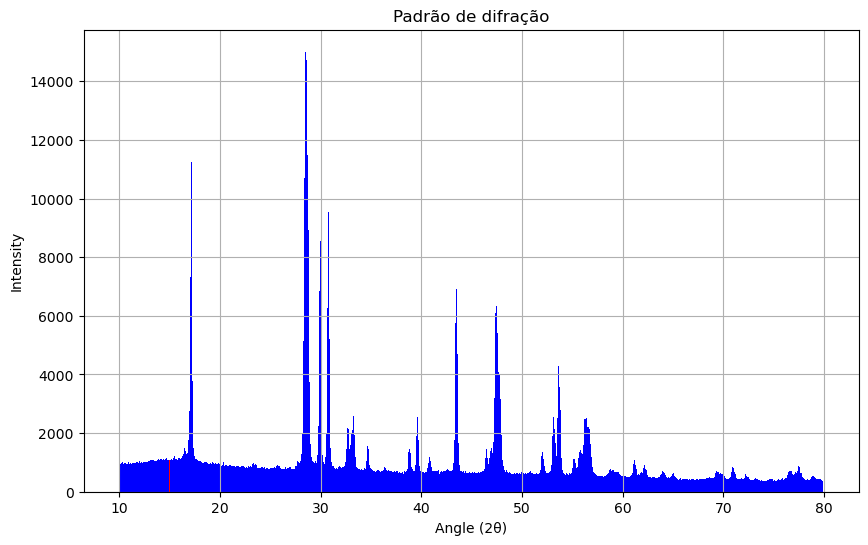

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
caminho = r"C:\Users\aojor\Downloads\repositorioCienciasExatasTerra\PIBIC\projeto\dados\NaYF4-Yb-Er\dados\testesParaPython\YNaF4-Tiago.xy"
dataNaYF4 = pd.read_csv(caminho, delim_whitespace=True,header=None, names=['x','y'])
print(dataNaYF4)
plt.figure(figsize=(10,6))
plt.bar(dataNaYF4["x"],dataNaYF4["y"],width=0.1,color="b")
plt.bar(dataNaYF4.iloc[100,0],dataNaYF4.iloc[100,1],width=0.1,color="r")
plt.xlabel('Angle (2θ)')
plt.ylabel('Intensity')
plt.title('Padrão de difração')
plt.grid(True)
plt.show()
